In [3]:
import pandas as pd  # requires: pip install pandas
import torch
from chronos import BaseChronosPipeline
import matplotlib.pyplot as plt 

In [4]:
pipeline = BaseChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",  # use "amazon/chronos-bolt-small" for the corresponding Chronos-Bolt model
    device_map="cpu",  # use "cpu" for CPU inference
    torch_dtype=torch.bfloat16,
)

df = pd.read_csv(
    "https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv"
)

In [24]:
# context must be either a 1D tensor, a list of 1D tensors,
# or a left-padded 2D tensor with batch as the first dimension
# quantiles is an fp32 tensor with shape [batch_size, prediction_length, num_quantile_levels]
# mean is an fp32 tensor with shape [batch_size, prediction_length]
quantiles, mean = pipeline.predict_quantiles(
    context=torch.tensor(df["#Passengers"]),
    prediction_length=12,
    quantile_levels=[0.1, 0.5, 0.9],
)

In [23]:
print(quantiles)

(tensor([[[435.2439, 441.8196, 458.4649],
         [406.8850, 422.2975, 440.1758],
         [439.3538, 458.2594, 479.8367],
         [447.7792, 475.7268, 506.1404],
         [468.1234, 490.1116, 540.4584],
         [530.1837, 565.1183, 601.2857],
         [622.4520, 654.5095, 688.0056],
         [616.2870, 643.2073, 704.6511],
         [521.3472, 541.4860, 600.4637],
         [459.6980, 484.9741, 529.3615],
         [398.2541, 424.3524, 454.7660],
         [443.4637, 471.6168, 503.2635]]]), tensor([[444.1830, 423.0167, 460.0062, 475.5213, 498.0233, 570.5638, 655.2288,
         652.9684, 554.5350, 491.7556, 425.2772, 471.7196]]))


In [28]:
quantiles.shape

torch.Size([1, 12, 3])

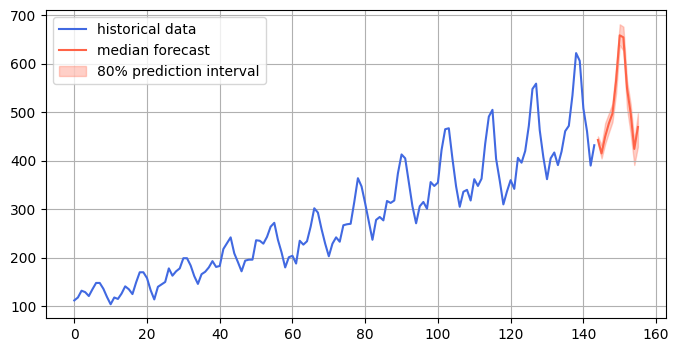

In [6]:
forecast_index = range(len(df), len(df) + 12)
low, median, high = quantiles[0, :, 0], quantiles[0, :, 1], quantiles[0, :, 2]

plt.figure(figsize=(8, 4))
plt.plot(df["#Passengers"], color="royalblue", label="historical data")
plt.plot(forecast_index, median, color="tomato", label="median forecast")
plt.fill_between(
    forecast_index,
    low,
    high,
    color="tomato",
    alpha=0.3,
    label="80% prediction interval",
)
plt.legend()
plt.grid()
plt.show()

In [13]:
print(low.shape)
print(median)
print(high)


torch.Size([12])
tensor([442.8472, 415.1049, 450.0396, 476.7542, 497.3040, 565.1182, 658.6195,
        654.5095, 549.7058, 498.3315, 424.3524, 469.5618])
tensor([450.2451, 432.3669, 477.9873, 497.7151, 518.2648, 593.8879, 681.4297,
        676.4979, 565.3238, 517.0317, 441.8198, 497.9204])


In [19]:
print(quantiles.shape)
print(quantiles[0, :, 1].shape)  # low quantile

torch.Size([1, 12, 3])
torch.Size([12])
